# 手写字符识别

## 数据准备

In [39]:
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch
from torch import optim

In [4]:
# 原始数据观察
trainset = torchvision.datasets.KMNIST(root='./chp3_kmnist_data', train=True,
                                       download=True)
trainset

100%|██████████| 18.2M/18.2M [00:09<00:00, 1.87MB/s]


Extracting ./chp3_kmnist_data\KMNIST\raw\train-images-idx3-ubyte.gz to ./chp3_kmnist_data\KMNIST\raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 194kB/s]


Extracting ./chp3_kmnist_data\KMNIST\raw\train-labels-idx1-ubyte.gz to ./chp3_kmnist_data\KMNIST\raw



100%|██████████| 3.04M/3.04M [00:02<00:00, 1.47MB/s]


Extracting ./chp3_kmnist_data\KMNIST\raw\t10k-images-idx3-ubyte.gz to ./chp3_kmnist_data\KMNIST\raw



100%|██████████| 5.12k/5.12k [00:00<00:00, 2.06MB/s]

Extracting ./chp3_kmnist_data\KMNIST\raw\t10k-labels-idx1-ubyte.gz to ./chp3_kmnist_data\KMNIST\raw



Dataset KMNIST
    Number of datapoints: 60000
    Root location: ./chp3_kmnist_data
    Split: Train

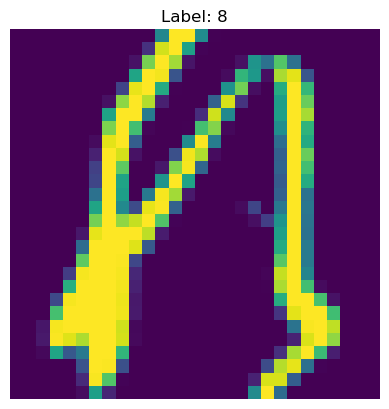

In [ ]:
import matplotlib.pyplot as plt
# 获取第一个样本
image, label = trainset[0] #包含图像和标签

# 可视化图像
plt.imshow(image,cmap='gray')#
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

In [ ]:
# 下载数据并转换为tensor
transform = transforms.Compose([
    transforms.ToTensor(),  # 将图像转换为Tensor
    # transforms.Normalize((0.5,), (0.5,))  # 归一化处理
])

# 加载训练集
trainset = torchvision.datasets.KMNIST(root='./chp3_kmnist_data', train=True,
                                       download=True,transform=transform)

# 加载测试集
testset = torchvision.datasets.KMNIST(root='./chp3_kmnist_data', train=False,
                                      download=True,transform=transform)

In [ ]:
trainset[0][0]# 28 * 28
trainset[0][1]# y

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.4627, 1.0000, 1.0000, 0.4863, 0.0039,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1412, 0.9333, 1.0000, 0.5725, 0.0078, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0471, 0.7961, 1.0000, 0.8627, 0.0549, 0.0000, 0.0000,
          0.0000, 0.0431, 0.5176, 0.3725, 0.7333, 0.3725, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.5843, 1.0000, 0.9843, 0.2588, 0.0000, 0.0000, 0.0000,
          0.0275, 0.6588, 0.5333, 0.0392, 0.8745, 0.9608,

In [ ]:
# 查看训练集标签
set([trainset[i][1] for i in range(len(trainset))]) 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [22]:
testset

Dataset KMNIST
    Number of datapoints: 10000
    Root location: ./chp3_kmnist_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

> 训练集：60000 个样本  
> 测试集：10000 个样本  
> 标签：{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} 10个类别

## 模型训练

In [52]:
# 参数设置
learning_rate = 1e-3
batch_size = 128
epochs = 50

# 构建数据加载器，每次用一定数量的样本进行训练
trainloader = torch.utils.data.DataLoader(trainset
                                          , batch_size=batch_size
                                          , shuffle=True
                                          ,drop_last=True)

# 模型构建
model = nn.Sequential(
    nn.Linear(28*28,256), # 784维数据,256个神经元
    nn.ReLU(),
    nn.Linear(256,32), # 增加隐藏层
    nn.ReLU(),    
    nn.Linear(32,10)# 输出10个结果
    # 删除softmax层,因为交叉熵损失函数中包含了softmax层
)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_list = []
# 训练模型
for epoch in range(epochs): #每个epoch都要以batch_size抽样遍历整个数据集，每次抽取的batch_size的样本是不同的
    running_loss = 0.0
    for images, labels in trainloader:
        # 数据预处理
        images = images.view(-1, 28*28)
        
        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    loss_list.append(loss.item())

Epoch [1/50], Loss: 2.2914
Epoch [2/50], Loss: 2.2762
Epoch [3/50], Loss: 2.2742
Epoch [4/50], Loss: 2.2705
Epoch [5/50], Loss: 2.2214
Epoch [6/50], Loss: 2.2180
Epoch [7/50], Loss: 2.1763
Epoch [8/50], Loss: 2.1350
Epoch [9/50], Loss: 2.0744
Epoch [10/50], Loss: 2.0127
Epoch [11/50], Loss: 2.0044
Epoch [12/50], Loss: 1.8628
Epoch [13/50], Loss: 1.7479
Epoch [14/50], Loss: 1.7338
Epoch [15/50], Loss: 1.7102
Epoch [16/50], Loss: 1.5124
Epoch [17/50], Loss: 1.4854
Epoch [18/50], Loss: 1.4492
Epoch [19/50], Loss: 1.3510
Epoch [20/50], Loss: 1.1377
Epoch [21/50], Loss: 1.1014
Epoch [22/50], Loss: 0.9737
Epoch [23/50], Loss: 0.9460
Epoch [24/50], Loss: 1.0162
Epoch [25/50], Loss: 1.1456
Epoch [26/50], Loss: 0.9247
Epoch [27/50], Loss: 0.9927
Epoch [28/50], Loss: 0.9010
Epoch [29/50], Loss: 0.8964
Epoch [30/50], Loss: 0.8672
Epoch [31/50], Loss: 0.7126
Epoch [32/50], Loss: 0.7912
Epoch [33/50], Loss: 0.7497
Epoch [34/50], Loss: 0.8250
Epoch [35/50], Loss: 0.8892
Epoch [36/50], Loss: 0.8577
E

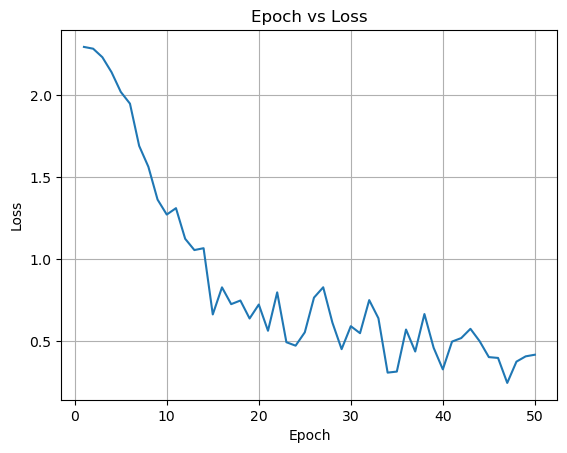

In [ ]:
# 绘制 epoch 和 loss 的图片 # batch_size = 64
# batch_size 更小的情况下loss下降得会更快，准确率从原本的73%下降到66%
plt.plot(range(1, epochs + 1), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.grid(True)
plt.show()

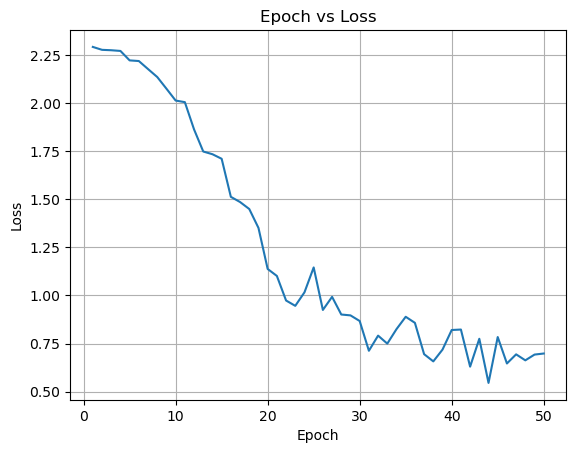

In [ ]:
# 绘制 epoch 和 loss 的图片 # batch_size = 128
plt.plot(range(1, epochs + 1), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.grid(True)
plt.show()

In [54]:
torch.save(model, 'model.pth')

## 模型预测

In [55]:
# 加载整个模型
loaded_model = torch.load('model.pth')
loaded_model.eval()  # 设置为评估模式


C:\Users\czx\AppData\Local\Temp\ipykernel_24064\4161466079.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load('model.pth')


Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
)

In [56]:
# 用模型预测测试集并计算准确率
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():  # 不需要计算梯度
    for data in testloader:
        images, labels = data
        outputs = loaded_model(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)  # 获取预测的类别索引
        total += labels.size(0)  # 累加样本总数
        correct += (predicted == labels).sum().item()  # 累加正确预测的样本数

accuracy = 100 * correct / total
print(f'模型准确率: {accuracy}%')

模型准确率: 66.24%
